# HW2_Social Network 

## 소셜 네트워크 분석이 중요한 이유

* 스마트 디바이스의 급격한 확산
 - 온라인 접근성 증대
 - SNS (ex 페이스북, 트위터, 유튜브 등) 확산 가속화
 
 
* SNS 즉 소셜미디어는 온라인 인맥 네트워크와 메시지 정보가 결합된 구조
 - 네트워크 관계에 대한 측정과 이해가 필요
 - 네트워크 분석 방법론은 속성이 아닌 관계를 중심으로 분석하는 연구 방법론으로서 네트워크 관계를 측정하는 다양한 표준화된 척도를 제공
 - 소셜미디어 상에서 이루어지는 대인 관계, 정보의 메시지 구조 등 다양한 정보를 좀 더 포괄적으로 이해가능

## 네트워크 이론의 개요

* 네트워크 : 각각의 객체들이 상호 연결된 구조
* 구성요소 : node(Node,vertex)와 링크(link, edge)
    * 노드 : 고유한 속성을 가지고 있는 행위자
    * 링크 : 노드들간의 관계(relation)  
    
 
* **네트워크는 복수의 노드들이 연결된 구조**

## 그래프의 기본 개념
* 그래프 : 네트워크를 표현하는 모델링 과정에서 중요하게 사용됨
* 그래프의 기본개념
    * 그래프 이론(Graph theory) : 객체들 간의 네트워크 관계 모델을 수학적으로 표현한 그래프
    * 무방향(Undirected) 네트워크 : 책, 논문의 공저자, 네트워크, 페이스북의 친구 관계 네트워크
    * 방향(Directed) 네트워크 : 인터넷 주소의 하이퍼링크 네트워크, 전화통화 네트워크, 트위터의 리트윗, 팔로잉 네트워크

## 그래프의 표현 방법
* 이진 네트워크(binary network) vs 가중 네트워크(valued network)
    * 관계의 유뮤만을 표현 : **이진 네트워크(binary network)**
    * 관계의 정도를 함께 표시 : **가중 네트워크(valued network)**

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import os

In [40]:
head_url = "/assets/images/markdown_img/"

### 이진 네트워크

In [41]:
def draw_graph(input_G, layout="shell"):
    if layout=="shell":
        pos = nx.shell_layout(input_G)
    elif layout=="spring":
        pos = nx.spring_layout(input_G)
    elif layout=="spectral":
        pos = nx.spectral_layout(input_G)
    elif layout=="circular":
        pos = nx.circular_layout(input_G)
    elif layout=="random":
        pos = nx.random_layout(input_G)
    else:
        pos = nx.shell_layout(input_G)
        
    plt.figure()
    nx.draw_networkx_nodes(input_G, pos)
    nx.draw_networkx_edges(input_G, pos)
    nx.draw_networkx_labels(input_G, pos)
    nx.draw_networkx_edge_labels(input_G, pos)
    #plt.axis("off")

In [46]:
[(1,2), (2,3), (1,3)]

[(1, 2), (2, 3), (1, 3)]

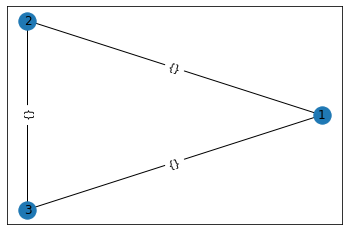

In [45]:
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (1,3)])
draw_graph(G)

### 위 그래프의 인접행렬

In [50]:
g = {'1' : ['2','3'],
     '2' : ['1','3'],
     '3' : ['1', '2']
    }

g

{'1': ['2', '3'], '2': ['1', '3'], '3': ['1', '2']}

In [66]:

edges = [(a, b) for a, bs in g.items() for b in bs]
df = pd.DataFrame(edges)
adj_matrix = pd.crosstab(df[0], df[1])

In [70]:
adj_matrix

1,1,2,3
0,,,
1,0,1,1
2,1,0,1
3,1,1,0


### 위 그래프의 노드리스트

In [67]:
g2 = pd.DataFrame(g)

In [69]:
g2.T

,0,1
1,2,3
2,1,3
3,1,2


### 위 그래프의 엣지리스트

In [132]:
df[3] = d

In [140]:
d=[]

for i in range(0,len(df)):
    z = int(df[0][i]) + int(df[1][i])
    d.append(z)

df[3] = d        

In [144]:
df = df.drop_duplicates([3], keep = 'first')


In [146]:
del df[3]

In [147]:
df

,0,1
0,1,2
1,1,3
3,2,3


### 가중 네트워크(가중치 표시)

[(1, 2), (2, 3)]
[(1, 2, {'weight': 3}), (2, 3, {'weight': 100})]


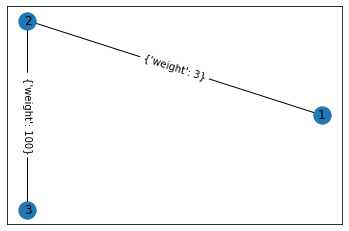

In [63]:
G = nx.Graph()
G.add_edges_from([(1, 2, {'weight':3}), 
                  (2, 3, {'weight':10})
                 ])


print( G.edges() )
print( G.edges(data=True) )
draw_graph(G)

### 가중 네트워크(링크 선 굵기)

{1: Text(1.0, 1.986821512250319e-08, '1'),
 2: Text(-0.5000000745058066, 0.8660254167122187, '2'),
 3: Text(-0.4999999254941933, -0.8660254365804337, '3')}

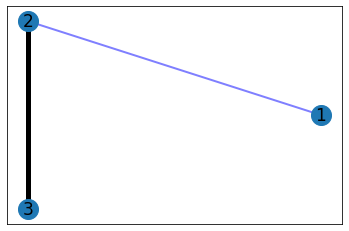

In [77]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G)  # positions for all nodes

# 노드 시각화 설정
nx.draw_networkx_nodes(G, pos, node_size=400)



# 링크 시각화 설정
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=5)

nx.draw_networkx_edges(G, pos, edgelist=esmall,width=2, alpha=0.5, edge_color='b')

nx.draw_networkx_labels(G, pos, font_size=17, font_family='sans-serif')


### 직접 수집한 데이터로 표현한 네트워크
* facebook-combined 데이터로 

In [3]:
os.chdir("C:/Users/ajou/Documents")

In [4]:
fb = nx.read_edgelist('facebook-combined.txt', create_using = nx.Graph(), nodetype = int)

In [5]:
print(nx.info(fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


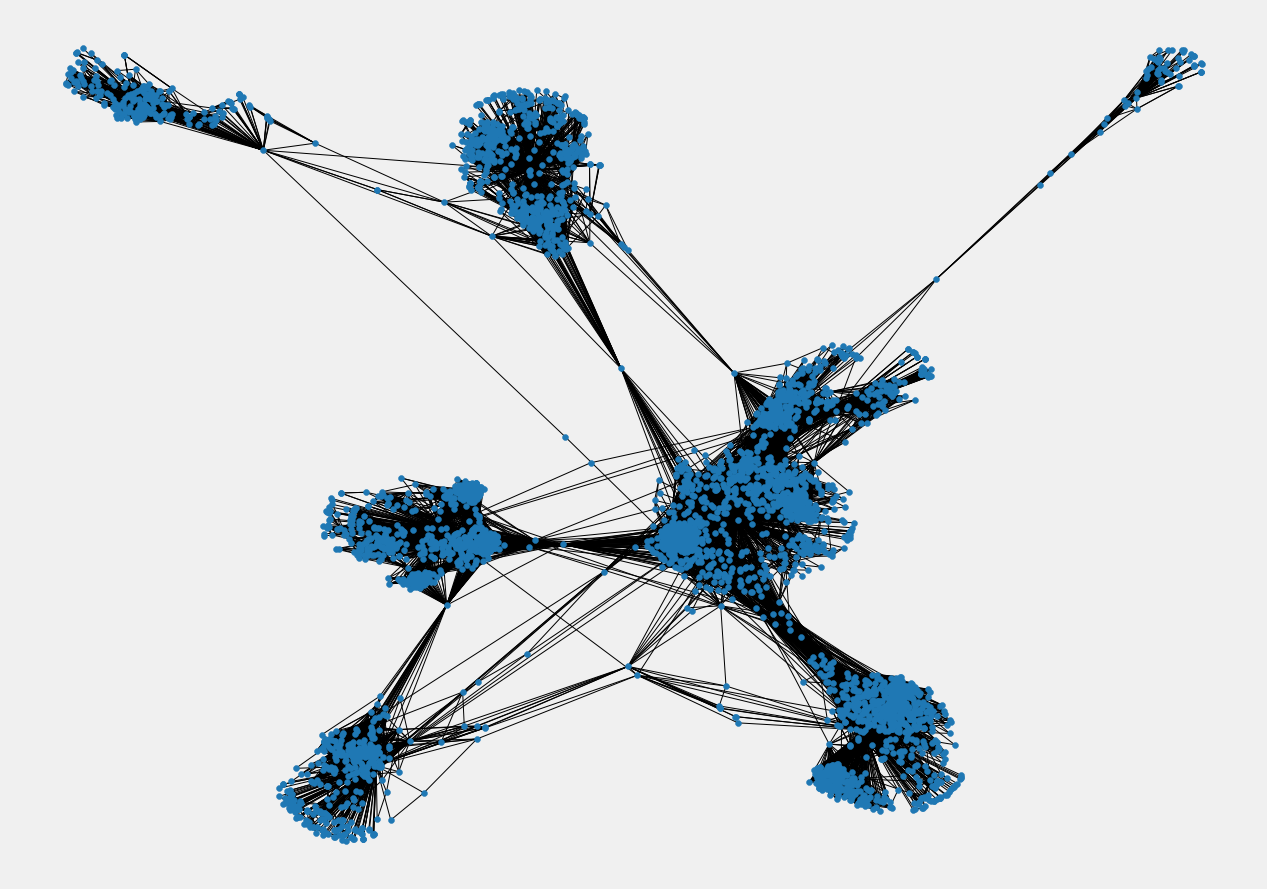

In [6]:
pos = nx.spring_layout(fb)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

### 연결정도 중심성 확인
* 네트워크 상에서 한 노드가 얼마나 많은 연결 관계를 가지고 있는 지를 측정하는 지표
* 많은 연결을 받는 노드는 상대적으로 의존성이 약함
* 노드에 연결된 링크의 수가 많아질수록 해당 노드의 연결 정도 중심성은 높음

In [27]:
bc = nx.betweenness_centrality(fb)

In [28]:
for i in range(0,5): #노드가 너무 많아 5개까지만 추출
    print(bc.get(i))

0.14630592147442917
2.7832744209034606e-06
7.595021178512074e-08
1.6850656559280464e-06
1.8403320547933104e-07


### 매개정도 중심성 확인
* 한 노드가 다른 노드들의 중간에서 얼마나 중개자 및 매개자 역할을 하고 있는 지를 측정
* 노드의 매개 중심성이 높을 수록 정보 및 자원의 흐름에 있어서 높은 통제력을 가짐
* 매개 중심성이 높은 노드는 관계 연결의 길목에서 정보를 왜곡하거나 관계 활동의 방해를 통해 네트워크를 위협할 수 있음
* 노드 i의 매개 중심성은 네트워크 내의 모든 노드 쌍의 최단 경로 중에서 노드 i가 포함되어 있는 경로의 비율로 정의되며, 이
것을 절대적 매개중심성이라고 한다. 상대적 매개중심성은 이렇게 계산한 절대적 매개 중심성 값을 이론상 가능한 매개 중
심성 최댓값으로 나누어 계산한다

In [12]:
degree = nx.degree_histogram(fb)
degree[0:5] #너무 많아 5번째 순서까지만 추출

[0, 75, 98, 93, 99]